In [ ]:
from avcv.all import *

In [ ]:
def wh(img):
    f = osp.join('/data/full-version-vip-pro/DMS_DB_090922/', img['file_name'])
    w, h = Image.open(f).size
    return dict(height=h, width=w)

In [ ]:
def convert_txt2json(txt_path, json_out_path):
    lines = open(txt_path).readlines()
    lines = [line[:-1] for line in lines]

    data = dict(
        images=[],
        annotations=[],
        categories=[
            dict(id=1, name='face'),
            dict(id=2, name='left_eye'),
            dict(id=3, name='right_eye'),
            dict(id=4, name='mouth'),
        ]
    )
    for line in lines:
        if line.startswith('#'): # image
            image = dict(file_name= line[2:], id=len(data['images']))
            image.update(wh(image))
            data['images'].append(image)
        else:
            x,y,w,h,cat = [float(_) for _ in line.split(' ')]
            cat = int(cat)
            ann = dict(
                id=len(data['annotations']),
                image_id=image['id'],
                category_id=cat,
                bbox=[x,y,w,h],
                area=h*w,
            )
            data['annotations'].append(ann)
    # ds = CocoDataset(data, '/data/full-version-vip-pro/DMS_DB_090922/')
    mmcv.dump(data, json_out_path)
convert_txt2json('/tmp/training_obj_annotations_new.txt', '/data/full-version-vip-pro/annotations/train.json')
convert_txt2json('/tmp/validation_obj_annotations_new.txt', '/data/full-version-vip-pro/annotations/val.json')

In [ ]:
ds = CocoDataset('/data/full-version-vip-pro/coco_annotations/train.json', '/data/full-version-vip-pro/DMS_DB_090922/')

2022-09-16 09:52:20.649 | INFO     | avcv.coco:visualize:191 - Random visualize img_id=3659


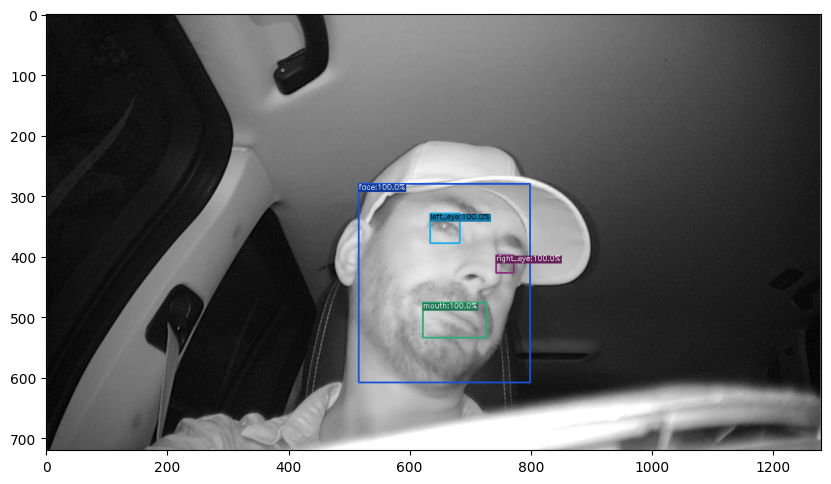

In [ ]:
ds.visualize(show=1);